# Intrinsic Dimension and Density Estimation
You can use external libraries for linear algebra operations but you are expected to write your own algorithms.
## Exercise 1
Using the dry beans dataset as we did in previous laboratories (ie. follow the
same preprocessing steps but do not perform a train-test split), program your
own implementation of the two-NN estimate for the Intrinsic Dimension.  
Is the result compatible with what you would expect from an analysis of PCA’s
spectrum?

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unsupervised_learning import histograms, KernelDensity, two_nn

In [26]:

# Loading beans
beans = pd.read_excel(
    'Unsupervised_Learning_2024/Datasets/Dry_Bean_Dataset.xlsx')
beans = beans.sample(1000)
# Extracting labels
classes = np.array(beans['Class'])

# Removing labels
beans = np.array(beans.drop(['Class'], axis=1))
beans = (beans-beans.mean())/beans.std()
print(two_nn(beans))


0.0


/Users/alessandroquerenghi/.venv/lib/python3.12/site-packages/unsupervised_learning/intrinsicdimensionality.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  mu[i] = data[i, 2]/data[i, 1]


## Exercise 2
Using the following code, create a one-dimensional dataset of size N = 100.
```python
X = np.concatenate(
(np.random.standard_t(1, int(0.04*N))-3.5,
np.random.normal(5, 1, int(0.48 * N)),
np.random.normal(7.5, 1, int(0.48 * N))
))[:, np.newaxis]
```
Compute the density estimation with your implementations of:
- Histogram Density Estimation (Freedman Diaconis rule)
- Kernel Density Estimation (KDE) - Gaussian kernel (Silverman’s rule)

In [27]:
N=100
X = np.concatenate((np.random.standard_t(1, int(0.04*N))-3.5, np.random.normal(5, 1, int(0.48 * N)),np.random.normal(7.5, 1, int(0.48 * N))))#[:, np.newaxis]
X.shape

(100,)

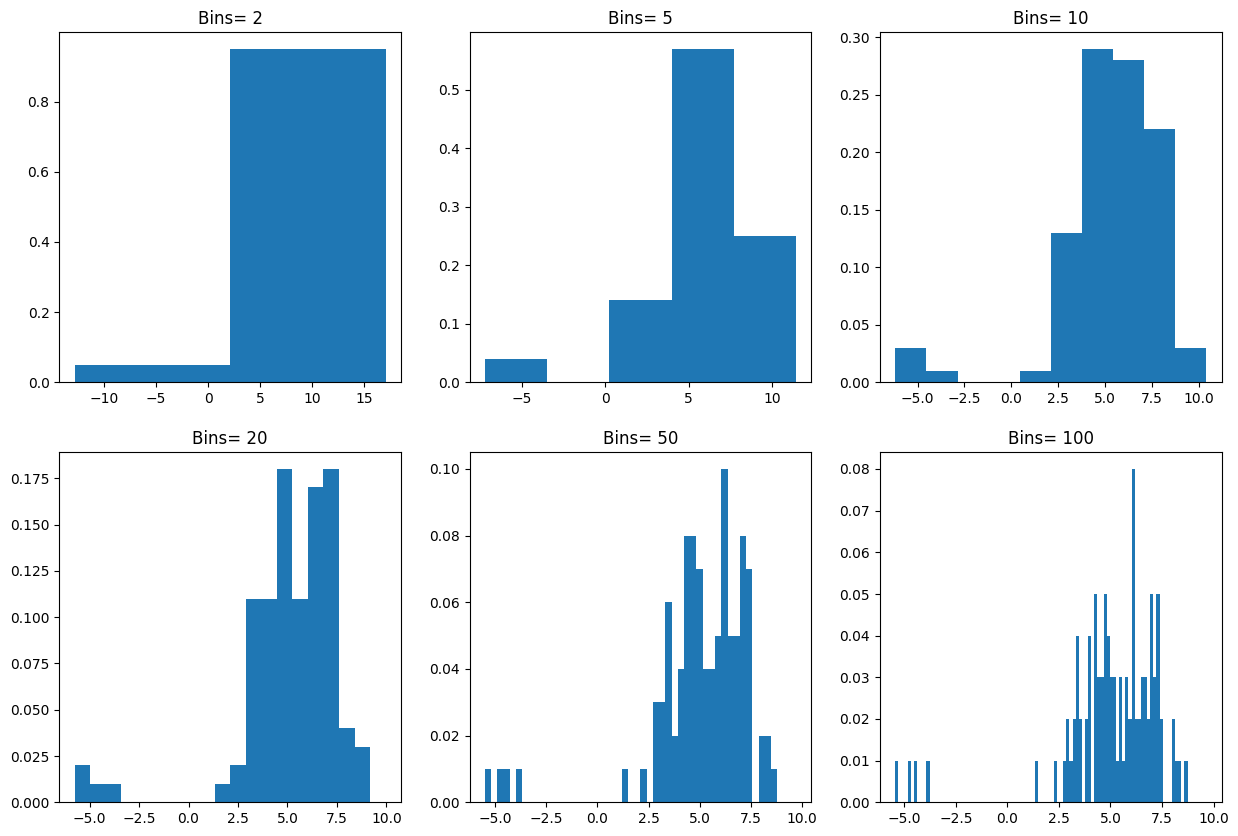

In [45]:
fig, axes = plt.subplots(2,3 ,figsize=(15,10))
for i, bins in enumerate([2, 5, 10, 20, 50, 100]):
    ax = axes[i//3, i%3]
    ax.bar(np.linspace(min(X), max(X), bins), histograms(X, bins=bins), width=(max(X)-min(X))/(bins-1))
    ax.set_title(f"Bins= {bins}")
plt.show()

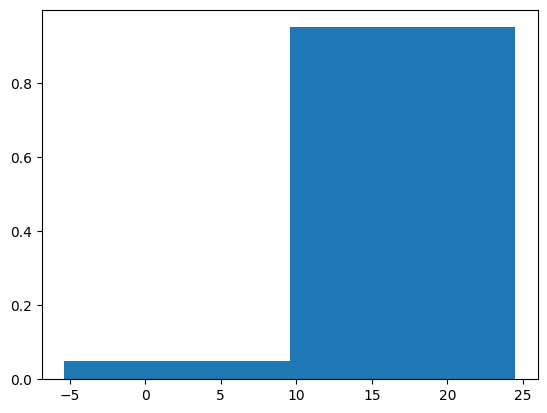

In [43]:
hist = histograms(X, bins=2)
plt.bar(np.linspace(min(X), max(X), hist.shape[0]), hist, width=(max(X)-min(X)), align='edge')
plt.show()

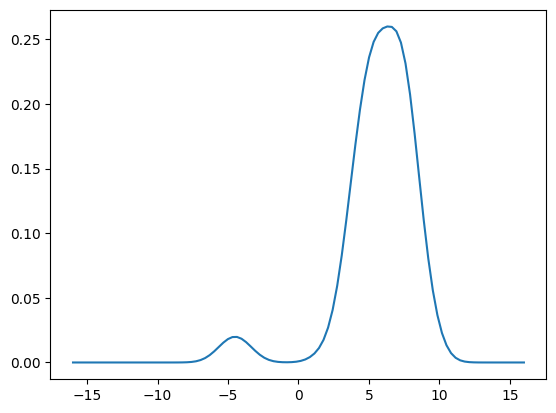

IndexError: index 2 is out of bounds for axis 0 with size 2

In [ ]:
kde = KernelDensity().fit(X)
xplot = np.linspace(-16,16,100)
plt.plot(xplot, kde.score_sample(xplot))
plt.show()
arr = np.zeros(2)

## Notes
- You can use the sklearn.neighbors.NearestNeighbors class. If you
have datapoints for which the distance to the first NN is null, you can
ignore them (it is a very small fraction of the whole dataset).
- For the two-NN estimate, you can check if your results align with the
ones provided by the following package, developed by a team in SISSA.
https://dadapy.readthedocs.io/en/latest/